# TP 4

Autor: Baldezzari Lucas

#### Librerias a utilizar

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

#### Carga de sets

In [2]:
trainset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv')

trainset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
trainset.columns, trainset.shape, trainset.shape

(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond

In [4]:
trainset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Analizando datos con ProfileReport

In [5]:
prifiledataTrainset = ProfileReport(trainset, title = "Reporte datos de entrenamiento", interactions=None)
#prifiledataTrainset

#### Missing values

Con la herramienta ProfileReport es posible notar que algunas columnas parecen tener datos perdidos. No obstante, analizando _data_description.txt_ es posible ver que muchos datos fueron registrados con las letras _NA_.

Las variables que toman valores _NA_ son,

- Alley
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- FireplaceQu
- GarageType
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence
- MiscFeature

Utilizando el método propuesto en clases se corrigen estas columnas.

In [6]:
trainset.PoolQC

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: PoolQC, Length: 1460, dtype: object

In [7]:
# Función auxiliar para convertir valores
def NA2None(cell):
    if cell == "NA":
        return "Nada"
    
NA_converter = {"Alley": NA2None, "BsmtQual": NA2None, "BsmtCond": NA2None,"BsmtExposure": NA2None,"BsmtFinType1": NA2None,
                "BsmtFinType2": NA2None,"FireplaceQu": NA2None,"GarageType": NA2None,"GarageFinish": NA2None,"GarageQual": NA2None,
               "GarageCond": NA2None, "PoolQC": NA2None, "Fence": NA2None, "MiscFeature": NA2None}

trainset = pd.read_csv('train.csv', converters=NA_converter) 
testset = pd.read_csv('test.csv', converters=NA_converter) 

In [8]:
trainset.PoolQC#, testset

0       Nada
1       Nada
2       Nada
3       Nada
4       Nada
        ... 
1455    Nada
1456    Nada
1457    Nada
1458    Nada
1459    Nada
Name: PoolQC, Length: 1460, dtype: object

### Revisión de datos numéricos

A continuación realizaré la revisión de algunas de las variables numéricas del set de entrenamiento para poder seleccionar algunas como mis features.

<AxesSubplot:title={'center':'2ndFlrSF vs SalePrice'}, xlabel='2ndFlrSF', ylabel='SalePrice'>

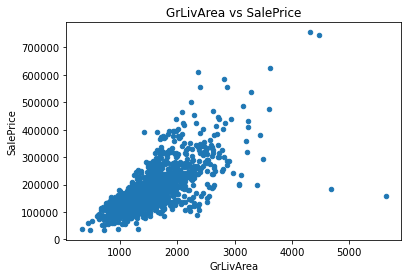

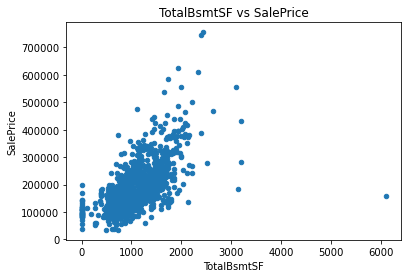

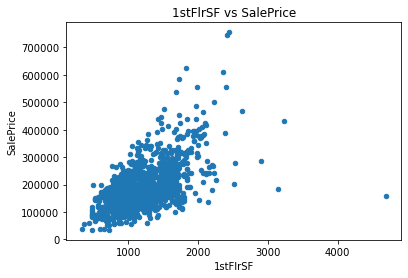

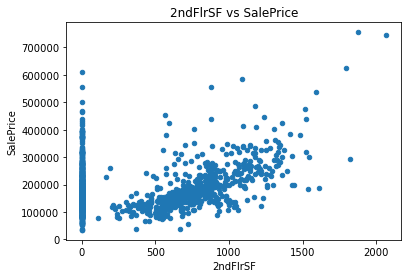

In [9]:
#Analizando variables de áreas construidas

trainset.plot.scatter(x="GrLivArea", y="SalePrice", title = "GrLivArea vs SalePrice")
trainset.plot.scatter(x="TotalBsmtSF", y="SalePrice", title ="TotalBsmtSF vs SalePrice")

trainset.plot.scatter(x="1stFlrSF", y="SalePrice", title ="1stFlrSF vs SalePrice")
trainset.plot.scatter(x="2ndFlrSF", y="SalePrice", title ="2ndFlrSF vs SalePrice")

<AxesSubplot:title={'center':'2ndFlrSF vs SalePrice (con filtro)'}, xlabel='2ndFlrSF', ylabel='SalePrice'>

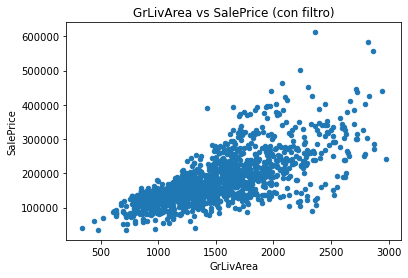

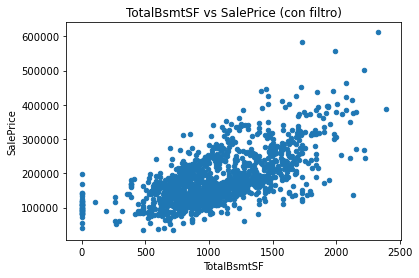

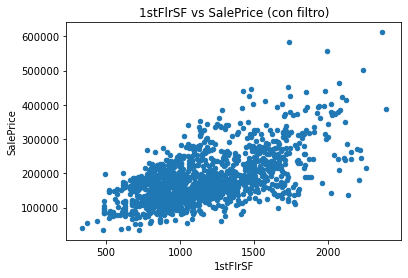

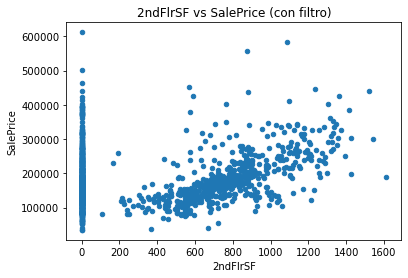

In [10]:
#Retirando outlayers

filtro = (trainset.GrLivArea <= 3000)
trainset = trainset.loc[filtro]

filtro = (trainset.TotalBsmtSF <= 3000)
trainset = trainset.loc[filtro]

filtro = (trainset["1stFlrSF"] <= 2500)
trainset = trainset.loc[filtro]

filtro = (trainset["2ndFlrSF"] <= 1800)
trainset = trainset.loc[filtro]

trainset.plot.scatter(x="GrLivArea", y="SalePrice", title = "GrLivArea vs SalePrice (con filtro)")
trainset.plot.scatter(x="TotalBsmtSF", y="SalePrice", title ="TotalBsmtSF vs SalePrice (con filtro)")

trainset.plot.scatter(x="1stFlrSF", y="SalePrice", title ="1stFlrSF vs SalePrice (con filtro)")
trainset.plot.scatter(x="2ndFlrSF", y="SalePrice", title ="2ndFlrSF vs SalePrice (con filtro)")

Podemos notar cierta relación lineal entre la cantidad de pies cuadradoes y el precio de cada casa.

A cotinuación voy a sumar las áreas construidas de cada casa en una sola variable.

In [11]:
trainset["totalArea"] =  trainset.GrLivArea + trainset.TotalBsmtSF + trainset["1stFlrSF"] + trainset["2ndFlrSF"]
testset["totalArea"] =  testset.GrLivArea + testset.TotalBsmtSF + testset["1stFlrSF"] + testset["2ndFlrSF"]

trainset["totalArea"]

0       4276
1       3786
2       4492
3       4190
4       5541
        ... 
1455    4247
1456    5688
1457    5832
1458    3234
1459    3768
Name: totalArea, Length: 1436, dtype: int64

<AxesSubplot:title={'center':'totalArea vs SalePrice'}, xlabel='totalArea', ylabel='SalePrice'>

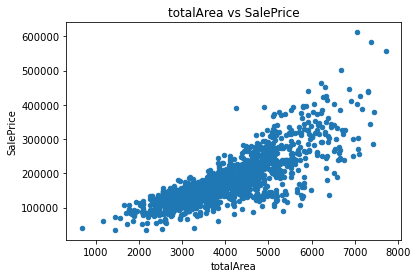

In [12]:
trainset.plot.scatter(x="totalArea", y="SalePrice", title = "totalArea vs SalePrice")

<AxesSubplot:title={'center':'HalfBath vs SalePrice'}, xlabel='HalfBath', ylabel='SalePrice'>

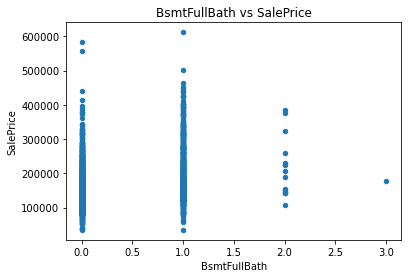

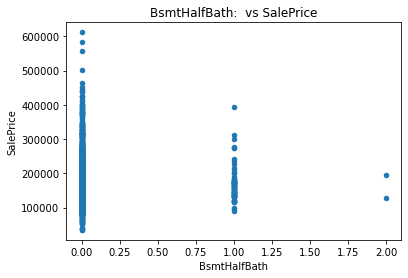

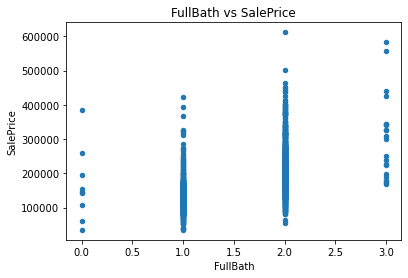

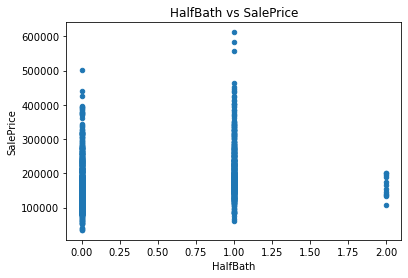

In [13]:
#Analizando cantidad de baños

trainset.plot.scatter(x="BsmtFullBath", y="SalePrice", title = "BsmtFullBath vs SalePrice")
trainset.plot.scatter(x="BsmtHalfBath", y="SalePrice", title ="BsmtHalfBath:  vs SalePrice")

trainset.plot.scatter(x="FullBath", y="SalePrice", title ="FullBath vs SalePrice")
trainset.plot.scatter(x="HalfBath", y="SalePrice", title ="HalfBath vs SalePrice")

##### Año de construcción

<AxesSubplot:title={'center':'YearBuilt vs SalePrice'}, xlabel='YearBuilt', ylabel='SalePrice'>

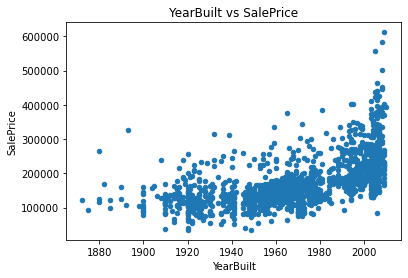

In [14]:
trainset.plot.scatter(x="YearBuilt", y="SalePrice", title ="YearBuilt vs SalePrice")

In [15]:
#sumo cantidad de baños y lo guardo en una única variable

trainset["totalBaths"] =  trainset.BsmtFullBath + trainset.BsmtHalfBath + trainset.FullBath + trainset.HalfBath
testset["totalBaths"] =  testset.BsmtFullBath + testset.BsmtHalfBath + testset.FullBath + testset.HalfBath

trainset["totalBaths"]

0       4
1       3
2       4
3       2
4       4
       ..
1455    3
1456    3
1457    2
1458    2
1459    3
Name: totalBaths, Length: 1436, dtype: int64

<AxesSubplot:title={'center':'totalBaths vs SalePrice'}, xlabel='totalBaths', ylabel='SalePrice'>

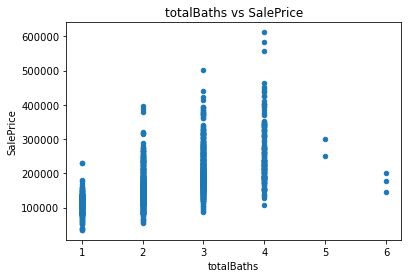

In [16]:
trainset.plot.scatter(x="totalBaths", y="SalePrice", title = "totalBaths vs SalePrice")
#trainset.FireplaceQu

#### Observando correlación de variables numéricas

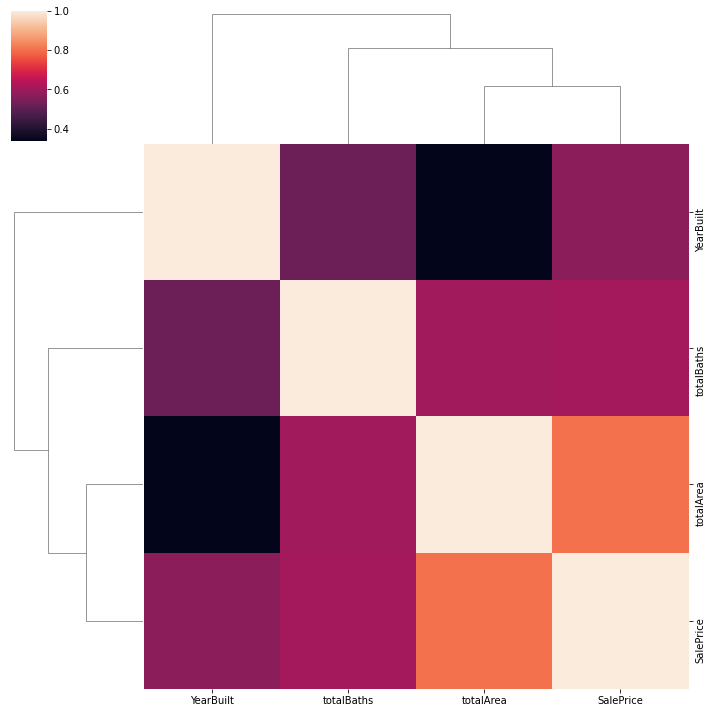

In [17]:
from seaborn import clustermap

clustermap(trainset[["totalArea","totalBaths", "YearBuilt","SalePrice"]].corr())

### Revisión de variables categóricas

<AxesSubplot:title={'center':'LotShape vs SalePrice'}, xlabel='LotShape', ylabel='SalePrice'>

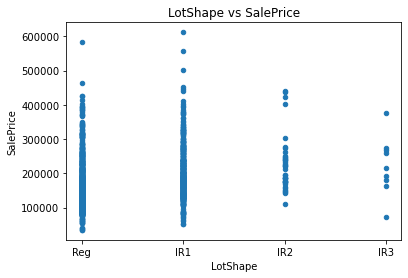

In [18]:
trainset.plot.scatter(x="LotShape", y="SalePrice", title = "LotShape vs SalePrice")

<AxesSubplot:title={'center':'ExterQual vs SalePrice'}, xlabel='ExterQual', ylabel='SalePrice'>

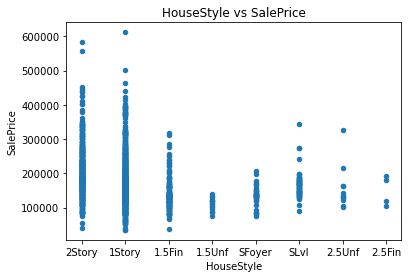

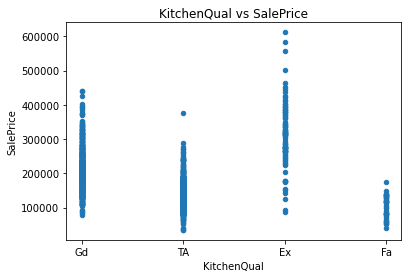

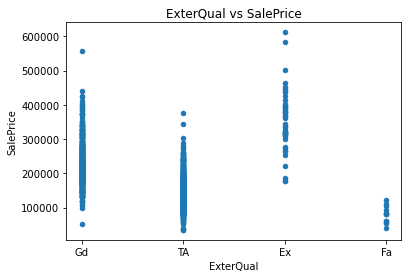

In [19]:
trainset.plot.scatter(x="HouseStyle", y="SalePrice", title = "HouseStyle vs SalePrice")
#trainset.plot.scatter(x="FireplaceQu", y="SalePrice", title = "FireplaceQu vs SalePrice")
trainset.plot.scatter(x="KitchenQual", y="SalePrice", title = "KitchenQual vs SalePrice")
trainset.plot.scatter(x="ExterQual", y="SalePrice", title = "ExterQual vs SalePrice")


#trainset.MSSubClass

### Selección de features

Las features utilziadas en clase por los profesores fueron:
- GrLivArea
- OverallQual
- LandSlope
- Neighborhood

La idea es buscar features diferentes a estas.

Luego de un análisis previo se propone usar las features

- totalArea, totalBaths, OverallCond y YearBuilt [numéricas]
- LotShape, KitchenQual, ExterQual [categórica ordinal]
- HouseStyle [categórica nominal]


#### Transformando columnas

A continuación reducire el temaño de mi set de entrenamiento y transformare las columnas de variables categóricas

In [20]:
trainsetRed = trainset[["totalArea", "totalBaths", "YearBuilt","OverallCond",
                        "LotShape", "KitchenQual","ExterQual", "HouseStyle", "SalePrice"]]
testsetRed = testset[["totalArea", "totalBaths", "YearBuilt","OverallCond",
                        "LotShape", "KitchenQual","ExterQual", "HouseStyle"]]
#trainsetRed

In [21]:
features_col = ["totalArea", "totalBaths", "YearBuilt","OverallCond",
                        "LotShape", "KitchenQual","ExterQual", "HouseStyle"]

X_train = trainsetRed.loc[:, features_col].values
X_test = testsetRed.loc[:, features_col].values
y_train = trainsetRed.loc[:, "SalePrice"].values

X_train, X_test

trainsetRed.KitchenQual.value_counts()

TA    732
Gd    576
Ex     90
Fa     38
Name: KitchenQual, dtype: int64

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler

# Se definen las transformaciones para las entradas
preprocessor = make_column_transformer(
    (StandardScaler(), [0,1,2,3]), #totalArea, talBaths y years
    (OrdinalEncoder(categories=[("Reg", "IR1", "IR2", "IR3")]), [4]), #LotShape
    (OrdinalEncoder(categories=[("Ex", "Gd", "TA", "Fa", "Po")]), [5]), #KitchenQual
    (OrdinalEncoder(categories=[("Ex", "Gd", "TA", "Fa", "Po")]), [6]), #ExterQual
    (OneHotEncoder(), [7]),
    remainder='passthrough'
)
#preprocessor

In [23]:
# Display resultados solo a los fines de ejemplificar
display("original", X_train[100:103])
display("transformed", preprocessor.fit_transform(X_train[100:103]))

'original'

array([[4830, 3, 1977, 7, 'IR1', 'Gd', 'TA', '1Story'],
       [4205, 3, 1985, 5, 'Reg', 'Gd', 'Gd', '2Story'],
       [3070, 2, 1979, 5, 'Reg', 'TA', 'TA', '1Story']], dtype=object)

'transformed'

array([[ 1.09127892,  0.70710678, -0.98058068,  1.41421356,  1.        ,
         1.        ,  2.        ,  1.        ,  0.        ],
       [ 0.23335524,  0.70710678,  1.37281295, -0.70710678,  0.        ,
         1.        ,  1.        ,  0.        ,  1.        ],
       [-1.32463416, -1.41421356, -0.39223227, -0.70710678,  0.        ,
         2.        ,  2.        ,  1.        ,  0.        ]])

##### Utilizando un pipeline

In [24]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression

regLR = LinearRegression()

# Regresor lineal básico con transformación de la salida
regLRlog = TransformedTargetRegressor(
    regressor=regLR, 
    func=np.log1p,         # log(1 + x)
    inverse_func=np.expm1  # exp(x) - 1
)

from sklearn.pipeline import make_pipeline

LRpipline = make_pipeline(preprocessor, regLRlog)
#LRpipline = make_pipeline(regLR)

In [25]:
from sklearn import set_config

set_config(display='diagram')

LRpipline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 2, 3]),
                                                 ('ordinalencoder-1',
                                                  OrdinalEncoder(categories=[('Reg',
                                                                              'IR1',
                                                                              'IR2',
                                                                              'IR3')]),
                                                  [4]),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[('Ex',
                                                                              'Gd',
                                                                              'TA',
                                                                              'Fa',
                                                                              'Po')]),
                                                  [5]),
                                                 ('ordinalencoder-3',
                                                  OrdinalEncoder(categories=[('Ex',
                                                                              'Gd',
                                                                              'TA',
                                                                              'Fa',
                                                                              'Po')]),
                                                  [6]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(), [7])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression()))])

In [26]:
from sklearn.model_selection import cross_validate

scores_to_use = ("r2", "neg_mean_squared_error")

cv_scores = cross_validate(LRpipline, X_train, y_train, cv=5, scoring=scores_to_use)
cv_scores

for sc in scores_to_use:
    print(sc, 
          cv_scores[f"test_{sc}"],
          np.mean(cv_scores[f"test_{sc}"]), 
          "", sep="\n")

r2
[0.85765883 0.85317312 0.84208383 0.88228806 0.82458436]
0.851957641590532

neg_mean_squared_error
[-7.43733388e+08 -8.67427153e+08 -8.99355412e+08 -5.94341680e+08
 -7.74225927e+08]
-775816712.3287319



#### Prediciendo sobre los datos de Test

In [27]:
LRpipline.fit(X_train, y_train) #Entrenamiento del modelo

pd.isna(testsetRed).any()

totalArea       True
totalBaths      True
YearBuilt      False
OverallCond    False
LotShape       False
KitchenQual     True
ExterQual      False
HouseStyle     False
dtype: bool

In [28]:
testsetRed.KitchenQual.value_counts(), testsetRed.totalArea.value_counts()

prifiledataTrainset = ProfileReport(testsetRed, title = "Reporte datos de testsetRed", interactions=None)
prifiledataTrainset

C:\Users\Lucas\Anaconda3\envs\AADoc\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
#y_pred = LRpipline.predict(X_test) 
#y_pred

## Informe

La presente notebook corresponde al TP Número 4 del curso _Aprendizaje Automático y Aplicaciones_ 2021.

El objetivo principal es poder predecir el precio de viviendas a partir de un set de datos obtenidos del desafío [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). 


##### Análisis de datos

Los datos provistos por el desafío contemplan un set de entrenamiento y un se de testeo.

El set de datos viene acompañado de un _data description_ el cual sirve para entender qué significa cada parámetro.

Utilizando esta información y con ayuda del material provisto por los profesores se procedió a realizar algunas gráficas con ánimos de encontrar cuales variables dentro del set tenían correlación con el precio de venta de las viviendas.

##### Modelo predictivo

Se utilizó un [Regresor Lineal](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) como modelo para lograr predecir el precio de las viviendas a partir de las features seleccionadas.

##### Selección de características

Se hizo un breve análisis de los parámetros dentro del set de datos.

- En primer lugar se utilizó ProfileReport para hacer un relevamiento de faltante de datos, correlaciones entre variables, etc. Se utilizó el método _NA2None()_ otorgado por los profesores para reemplazar los valores NA por "None". Los valores NA no eran un error o datos faltantes, sino parte de la carga de datos.
- El siguiente paso fue realizar algunas gráficas de puntos para observar la distribución de algunas variables vs el precio de venta para buscar alguna relación lineal entre estas.
- De manera similar se trabajó con algunas variables categóricas.

Las características seleccionadas fueron:

- totalArea, totalBaths, OverallCond y YearBuilt [numéricas]
- LotShape, KitchenQual, ExterQual [categórica ordinal]
- HouseStyle [categórica nominal]

##### Preparación de características

Se aplicaron algunas transformaciones vistas en clases sobre features elegidas para codificarlas de una manera adecuada.

También se aplicó una transforamción logarítmica sobre la salida del regresor lineal mediante el método _TransformedTargetRegressor_.

Finalment se integraron la transformación de features y la transformación a la salidad del regresor lineal a un _pipline_.

##### Validación cruzada

Mediante el método _cross_validate_ se realizó una validacipon cruzada sobre los datos de entrenamiento.

Se obtuvo un accuracy promedio de **0.85**.


**NOTA**: No he podido trabajar sobre los datos de test para dar solución al problema de los _Nan_ que me arroja el predictor cuando quiero predecir sobre el set de testeo.

Saludos.
